## Demonstration on how to use Microsoft's open-source resource estimator with Qualtran Bloqs

Having interopability with Microsoft's open-source resource estimator is useful because it allows users more flexiblity with their Qualtran programs and allows users to verify estimates given by Qualtran's resource estimator tooling.

In this notebook, we will demonstrate doing resource estimation on the `ModExp` Bloq, the essential subroutine in Shor's factoring algorithm.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/samuelkushnir/miniconda3/envs/Qualtran-testing/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


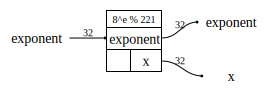

In [1]:
from qualtran.bloqs.factoring.mod_exp import ModExp
from qualtran.drawing import show_bloq

N = 13*17 # integer to factor
g = 8

mod_exp = ModExp(base=g, mod=N, exp_bitsize=32, x_bitsize=32)
show_bloq(mod_exp)

In [15]:
def get_bloq_logical_counts(bloq):
    from qsharp.estimator import LogicalCounts
    from qualtran._infra.gate_with_registers import get_named_qubits


    num_qubits = sum(len(r) for r in get_named_qubits(bloq.signature).values())
    complexity = bloq.t_complexity()

    return LogicalCounts({
        "numQubits": num_qubits,
        "tCount": complexity.t,
        "rotationCount": complexity.rotations,
        "rotationDepth": complexity.rotations
    })

In [17]:
estimates = get_bloq_logical_counts(mod_exp).estimate([
    {"qubitParams": {"name": "qubit_gate_ns_e3"}},
    {"qubitParams": {"name": "qubit_gate_ns_e4"}},
    {"qubitParams": {"name": "qubit_maj_ns_e4"}, "surfaceCode": {"name": "floquet_code"}},
    {"qubitParams": {"name": "qubit_maj_ns_e6"}, "surfaceCode": {"name": "floquet_code"}},
])

estimates

Item,0,1,2,3
Runtime,5 secs,2 secs,23 secs,9 secs
rQOPS,20.00M,42.22M,4.47M,10.86M
Physical qubits,361.74k,66.74k,381.86k,24.90k
Item,0,1,2,3
Logical algorithmic qubits,152,152,152,152
Algorithmic depth,662.53k,662.53k,662.53k,662.53k
Logical depth,662.53k,662.53k,662.53k,662.53k
Clock frequency,131.58k,277.78k,29.41k,71.43k
Number of T states,662.53k,662.53k,662.53k,662.53k
Number of T factories,14,13,14,10
